<a href="https://colab.research.google.com/github/johnvb21/DeepLearning/blob/main/Car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [3]:
car = pd.read_csv("/content/CarPrice_Assignment.csv")

In [4]:
preprocess = make_column_transformer(
    (MinMaxScaler(), ["wheelbase",
                    "carlength",
                    "carwidth",
                    "carheight",
                    "curbweight",
                    "enginesize",
                    "boreratio",
                    "stroke",
                    "compressionratio",
                    "horsepower",
                    "peakrpm",
                    "citympg",
                    "highwaympg"]),
    (OneHotEncoder(handle_unknown = "ignore"), ["CarName",
                                                "fueltype",
                                                "aspiration",
                                                "doornumber",
                                                "carbody",
                                                "drivewheel",
                                                "enginelocation",]), sparse_threshold=0
                                          
)

In [5]:
X = car.drop("price", axis=1)
X = X.drop("car_ID", axis=1)
X = X.drop("symboling", axis=1)

Y = car["price"]


In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [7]:
preprocess.fit(X_train)

ColumnTransformer(sparse_threshold=0,
                  transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['wheelbase', 'carlength', 'carwidth',
                                  'carheight', 'curbweight', 'enginesize',
                                  'boreratio', 'stroke', 'compressionratio',
                                  'horsepower', 'peakrpm', 'citympg',
                                  'highwaympg']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['CarName', 'fueltype', 'aspiration',
                                  'doornumber', 'carbody', 'drivewheel',
                                  'enginelocation'])])

In [8]:
X_train_normal =preprocess.transform(X_train)
X_test_normal = preprocess.transform(X_test)


In [9]:
tf.random.set_seed(22)

In [10]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(500, activation="relu"),

  tf.keras.layers.Dense(2000, activation="relu"),
  tf.keras.layers.Dense(2000, activation="relu"),
  tf.keras.layers.Dense(700, activation="relu"),

  tf.keras.layers.Dense(100, activation="relu"),

  tf.keras.layers.Dense(20, activation="relu"),   
  tf.keras.layers.Dense(1, activation="relu")                         
])

In [11]:
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr = 10**(-(7/2))),
              metrics=["mae"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [12]:
# lrs = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

In [13]:
history=model.fit(X_train_normal, Y_train, epochs=150)

Epoch 1/150
6/6 [==============================] - 1s 71ms/step - loss: 13221.8320 - mae: 13221.8320
Epoch 2/150
6/6 [==============================] - 0s 65ms/step - loss: 13203.5244 - mae: 13203.5244
Epoch 3/150
6/6 [==============================] - 0s 68ms/step - loss: 13104.2236 - mae: 13104.2236
Epoch 4/150
6/6 [==============================] - 0s 67ms/step - loss: 12713.5889 - mae: 12713.5889
Epoch 5/150
6/6 [==============================] - 0s 66ms/step - loss: 11462.0381 - mae: 11462.0381
Epoch 6/150
6/6 [==============================] - 0s 71ms/step - loss: 7980.6343 - mae: 7980.6343
Epoch 7/150
6/6 [==============================] - 0s 66ms/step - loss: 5381.1216 - mae: 5381.1216
Epoch 8/150
6/6 [==============================] - 0s 66ms/step - loss: 5895.6206 - mae: 5895.6206
Epoch 9/150
6/6 [==============================] - 0s 66ms/step - loss: 4582.9585 - mae: 4582.9585
Epoch 10/150
6/6 [==============================] - 0s 66ms/step - loss: 4363.1440 - mae: 4363.1440

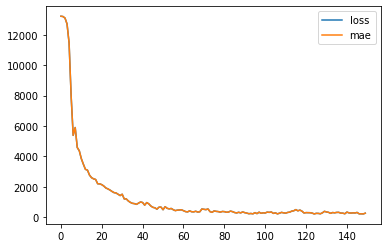

In [19]:
pd.DataFrame(history.history).plot()

In [20]:
model.evaluate(X_test_normal, Y_test)

2/2 [==============================] - 0s 12ms/step - loss: 2207.8728 - mae: 2207.8728


[2207.872802734375, 2207.872802734375]